Matplotlib is building the font cache; this may take a moment.


Logistic Regression Report:
              precision    recall  f1-score   support

           0       0.80      0.83      0.81        99
           1       0.67      0.62      0.64        55

    accuracy                           0.75       154
   macro avg       0.73      0.72      0.73       154
weighted avg       0.75      0.75      0.75       154

Random Forest Report:
              precision    recall  f1-score   support

           0       0.81      0.81      0.81        99
           1       0.65      0.65      0.65        55

    accuracy                           0.75       154
   macro avg       0.73      0.73      0.73       154
weighted avg       0.75      0.75      0.75       154

Logistic Regression Confusion Matrix:
[[82 17]
 [21 34]]
Random Forest Confusion Matrix:
[[80 19]
 [19 36]]


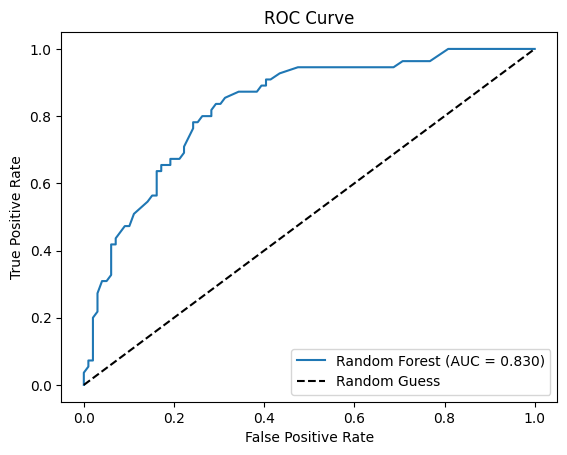

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score, roc_curve

# Step 1: Load the dataset
url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv'
columns = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']
data = pd.read_csv(url, names=columns)

# Step 2: Data Preprocessing
data[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']] = data[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']].replace(0, np.nan)
data.fillna(data.mean(), inplace=True)

X = data.drop('Outcome', axis=1)
y = data['Outcome']

# Step 3: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 4: Data Normalization
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 5: Logistic Regression Model
log_model = LogisticRegression(random_state=42)
log_model.fit(X_train_scaled, y_train)
y_pred_log = log_model.predict(X_test_scaled)

# Step 6: Random Forest Model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_scaled, y_train)
y_pred_rf = rf_model.predict(X_test_scaled)

# Step 7: Model Evaluation
print("Logistic Regression Report:")
print(classification_report(y_test, y_pred_log))

print("Random Forest Report:")
print(classification_report(y_test, y_pred_rf))

# Step 8: Confusion Matrix
cm_log = confusion_matrix(y_test, y_pred_log)
cm_rf = confusion_matrix(y_test, y_pred_rf)

print("Logistic Regression Confusion Matrix:")
print(cm_log)

print("Random Forest Confusion Matrix:")
print(cm_rf)

# Step 9: ROC Curve for Random Forest
y_pred_proba_rf = rf_model.predict_proba(X_test_scaled)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba_rf)

plt.figure()
plt.plot(fpr, tpr, label='Random Forest (AUC = {:.3f})'.format(roc_auc_score(y_test, y_pred_proba_rf)))
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

In [2]:
import joblib

# Save the Logistic Regression model
joblib.dump(log_model, 'logistic_regression_model.pkl')

# Save the Random Forest model
joblib.dump(rf_model, 'random_forest_model.pkl')

# Save the scaler used for normalization
joblib.dump(scaler, 'scaler.pkl')


['scaler.pkl']

In [4]:
# Load the saved models and scaler
log_model_loaded = joblib.load('logistic_regression_model.pkl')
rf_model_loaded = joblib.load('random_forest_model.pkl')
scaler_loaded = joblib.load('scaler.pkl')

# Example test case (assuming you have a new input test case)
new_test_case = np.array([[1, 90, 50, 32, 250, 26.1, 0.757, 40]])  # Example input

# Normalize the test case
new_test_case_scaled = scaler_loaded.transform(new_test_case)

# Predict using Logistic Regression model
log_pred = log_model_loaded.predict(new_test_case_scaled)
print(f"Logistic Regression Prediction: {log_pred[0]}")

# Predict using Random Forest model
rf_pred = rf_model_loaded.predict(new_test_case_scaled)
print(f"Random Forest Prediction: {rf_pred[0]}")


Logistic Regression Prediction: 0
Random Forest Prediction: 0


/home/jovyan/.local/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
